## Customer Profiles & Exploratory Data Analysis

In this section, I will first examine the main characteristics of customers who were detected and not detected by the logistic regression model (which was applied with oversampled data as it yielded the highest number of true positives (predicted churn)). This analysis aims to identify the features that the company should consider while improving the model to reduce the false negative rate.

Next, I will conduct an exploratory data analysis on current customers to determine which profiles are more valuable or lucrative for the company.

#### Import libraries and databases

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
data = pd.read_csv('./Files/clean_data_churn.csv', index_col=0)
test_data = pd.read_csv('./Files/test_data_churn.csv', index_col=0)

In [139]:
display(data.info())
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 185 to 1161
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1409 non-null   object 
 1   senior_citizen     1409 non-null   int64  
 2   partner            1409 non-null   object 
 3   dependents         1409 non-null   object 
 4   tenure             1409 non-null   int64  
 5   phone_service      1409 non-null   object 
 6   multiple_lines     1409 non-null   object 
 7   internet_service   1409 non-null   object 
 8   online_security    1409 non-null   object 
 9   online_backup      1409 non-null   object 
 10  device_protection  1409 non-null   object 
 11  tech_support       1409 non-null   object 
 12  streaming_tv       1409 non-null   object 
 13  streaming_movies   1409 non-null   object 
 14  contract           1409 non-null   object 
 15  paperless_billing  1409 non-null   object 
 16  payment_method     140

None

In [140]:
# Change senior_citizen to categorical as we did before
data['senior_citizen'] = data['senior_citizen'].astype('object')
test_data['senior_citizen'] = test_data['senior_citizen'].astype('object')

In [141]:
# Drop unnecessary column 'customer_id' as we did in the previous kernel
data = data.drop(['customer_id'],axis=1)

### Profile Customers Churn (detected and not detected)

In [142]:
display(test_data.head(), test_data.shape)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,churn_predictions
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,Yes,Yes
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No,No
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70,No,No
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes,Yes
132,Male,0,No,No,67,Yes,No,DSL,No,No,...,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10,No,No


(1409, 21)

I will analyze the predictions made with Logistic Regression - SMOTE in the previous kernel since it has the largest number of True Positives. However, given its lower precision score, first I will examine both the False Positives and, more importantly, the False Negatives (i.e., customers who were predicted as having no churn but actually left the company).

#### Analyzing False Positives & Negatives

In [143]:
# Select all wrong predictions
wrong_predictions = test_data[test_data['churn'] != test_data['churn_predictions']]
display(wrong_predictions[['churn','churn_predictions']].head(10))
print('Percentage of test data not well predicted:', round(len(wrong_predictions)/len(test_data)*100, 2), '%')

,churn,churn_predictions
811,Yes,No
2526,Yes,No
4129,No,Yes
833,No,Yes
3328,No,Yes
3469,No,Yes
6185,No,Yes
6112,No,Yes
1345,No,Yes
6608,Yes,No


Percentage of test data not well predicted: 24.34 %


In [144]:
# Select all rows predicted as 'Churn - Yes', but actually remained in the company.
false_positives = test_data[(test_data['churn_predictions'] == 'Yes') & (test_data['churn'] == 'No')]
display(false_positives[['churn','churn_predictions']].head(), false_positives.shape)
print('Percentage of False Positives:', round(len(false_positives)/len(wrong_predictions)*100, 2), '% (wrong predictions)')

,churn,churn_predictions
4129,No,Yes
833,No,Yes
3328,No,Yes
3469,No,Yes
6185,No,Yes


(281, 21)

Percentage of False Positives: 81.92 % (wrong predictions)


In [145]:
# Select rows predicted as 'No' but that actually left the company
false_negatives = test_data[(test_data['churn_predictions'] == 'No') & (test_data['churn'] == 'Yes')]
display(false_negatives[['churn','churn_predictions']].head(), false_negatives.shape)
print('Percentage of False Negatives:', round(len(false_negatives)/len(wrong_predictions)*100, 2), '% (wrong predictions)')

,churn,churn_predictions
811,Yes,No
2526,Yes,No
6608,Yes,No
5972,Yes,No
2638,Yes,No


(62, 21)

Percentage of False Negatives: 18.08 % (wrong predictions)


#### Profile of customers likely to churn but not detected by our prediction model

As our biggest concern is those who have actually left the company (Churn - Yes) and were not previously identified (churn_predictions - No), let's gather more information about these False Negatives.

In [146]:
false_negatives.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn',
       'churn_predictions'],
      dtype='object')

In [147]:
# Select categorical columns
categorical_cols = false_negatives.select_dtypes(include='object').columns.tolist()
# Remove 'Churn' and 'churn_predictions'
categorical_cols.remove('churn')
categorical_cols.remove('churn_predictions')

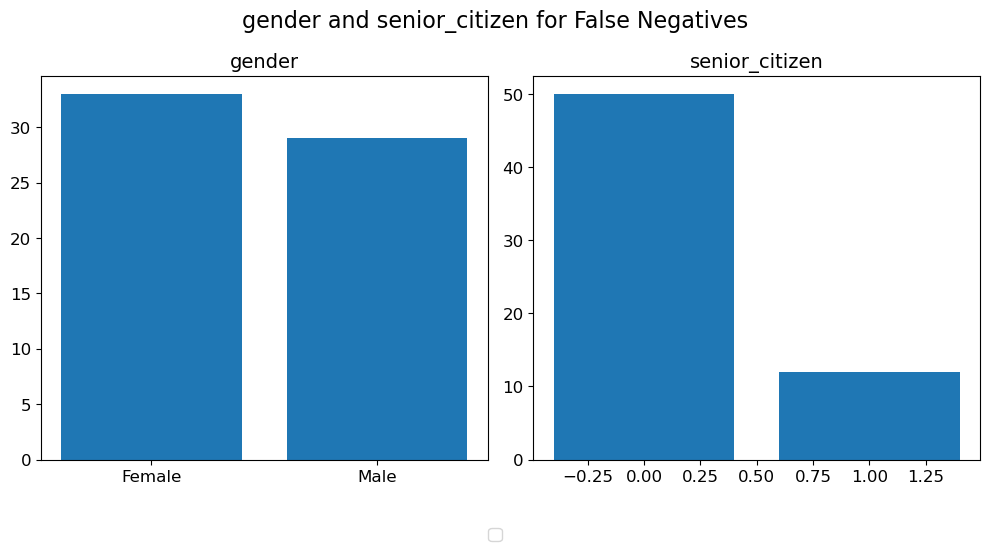

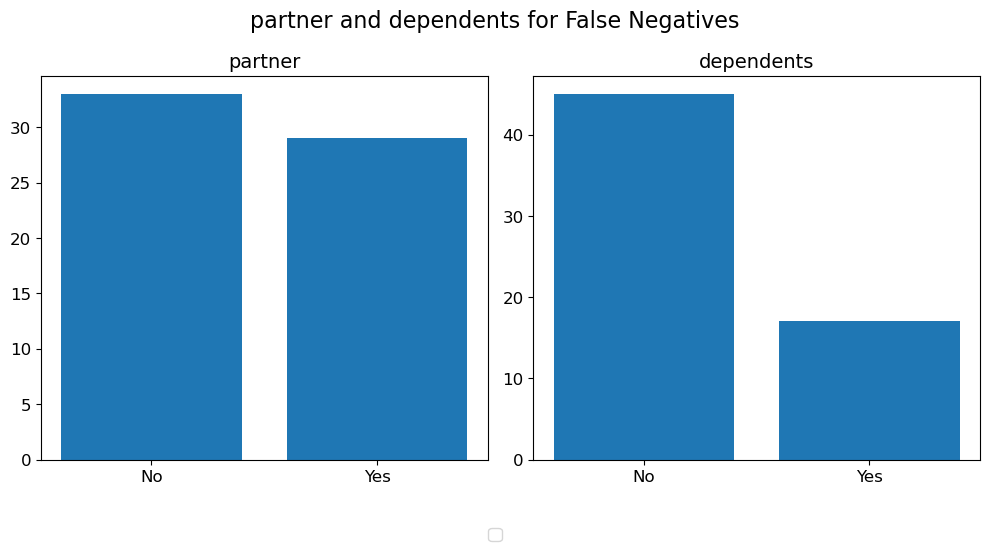

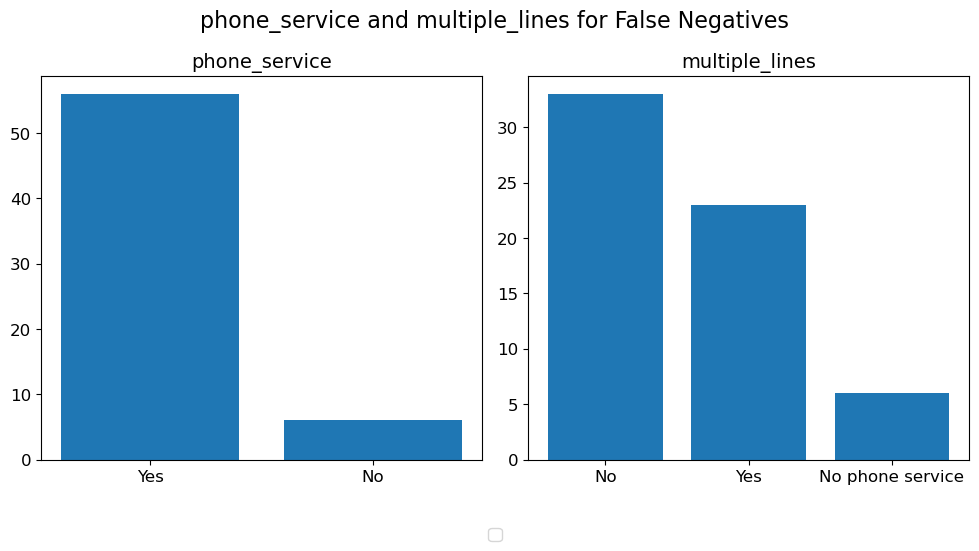

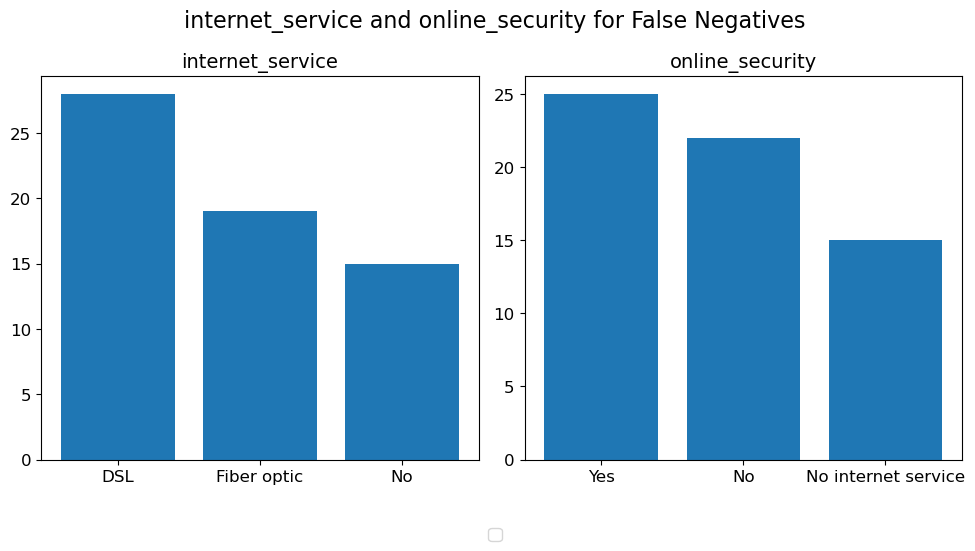

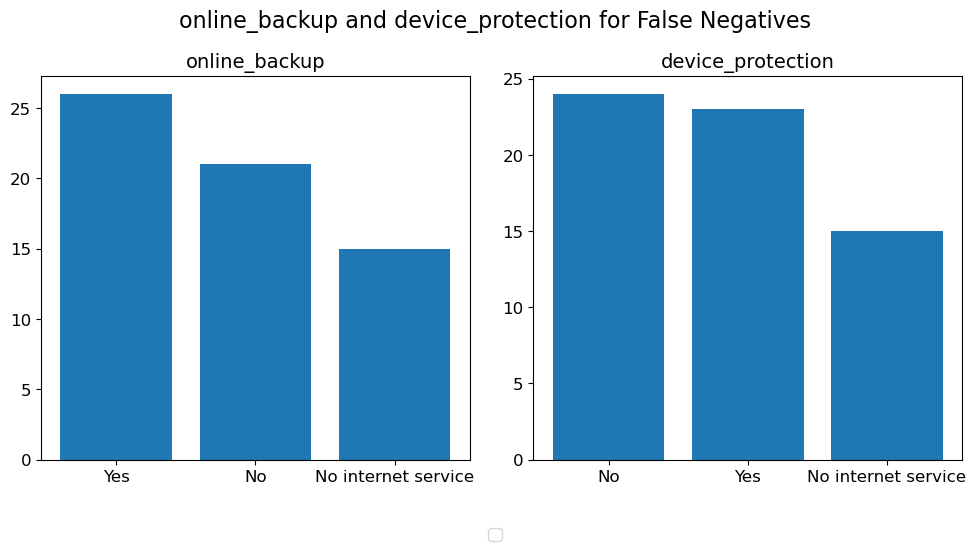

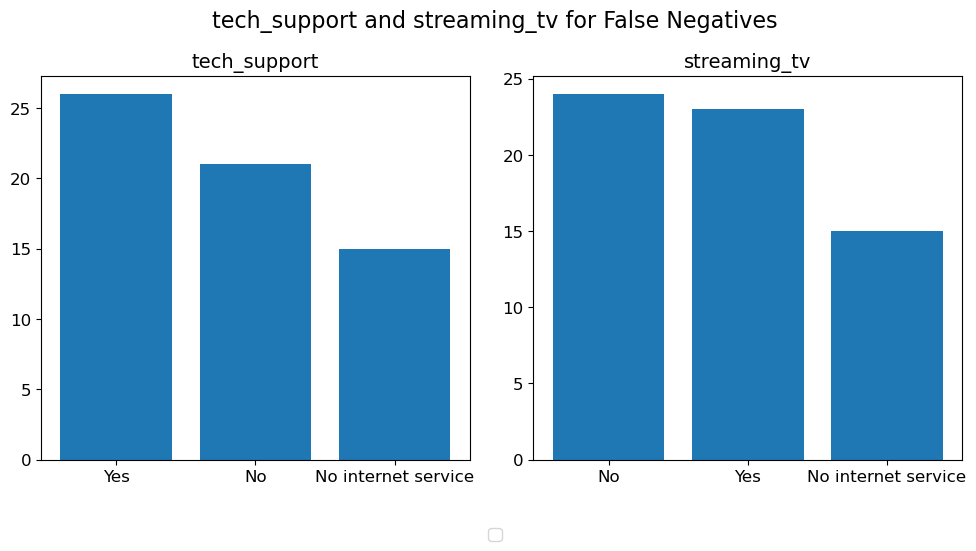

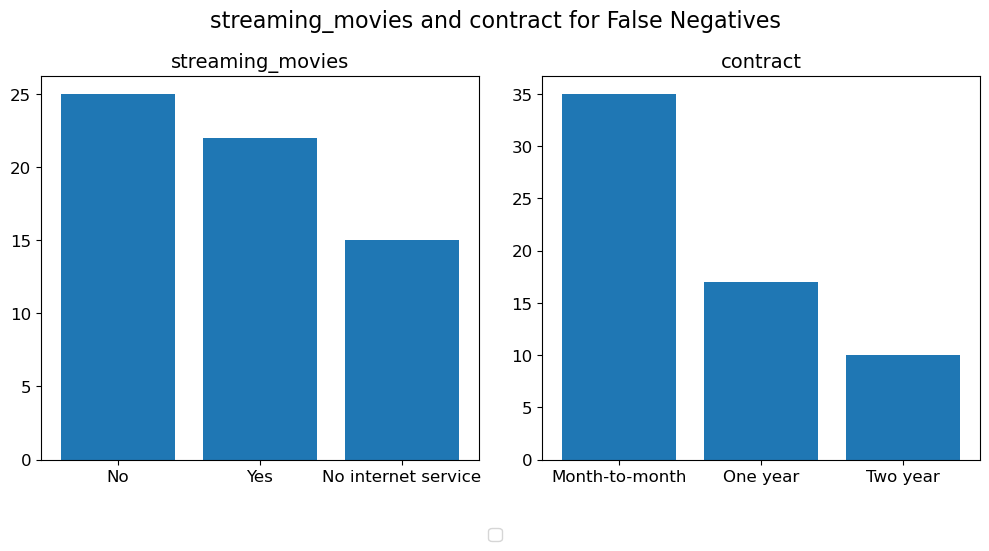

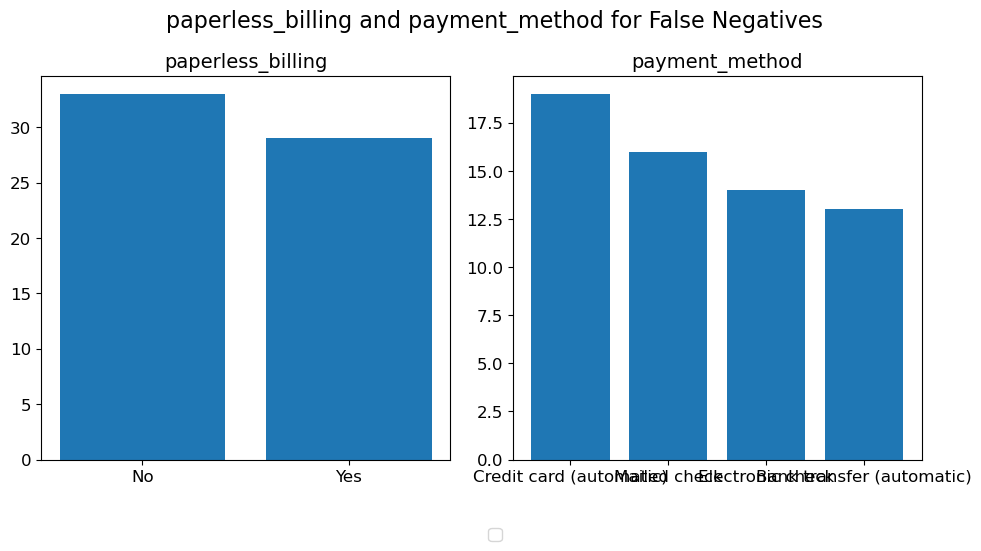

In [148]:
for i, col in enumerate(categorical_cols):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f"{col} and {categorical_cols[i+1]} for False Negatives", fontsize=16)
        
    axs[i%2].bar(false_negatives[col].value_counts().index, false_negatives[col].value_counts().values)
    axs[i%2].set_title(col, fontsize=14)
    axs[i%2].tick_params(axis='both', which='major', labelsize=12)
    axs[i%2].set_xlabel(None)
    
    if i % 2 == 1 or i == len(categorical_cols)-1:
        handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels), fontsize=12)
        plt.tight_layout()
        plt.show()

count    62.000000
mean     32.241935
std      25.885426
min       1.000000
25%       6.250000
50%      30.500000
75%      59.500000
max      72.000000
Name: tenure, dtype: float64

count     62.000000
mean      61.884677
std       31.072480
min       19.400000
25%       36.487500
50%       56.050000
75%       89.437500
max      110.850000
Name: monthly_charges, dtype: float64

count      62.000000
mean     2628.037097
std      2599.761880
min        19.400000
25%       237.150000
50%      1544.500000
75%      5237.475000
max      7689.950000
Name: total_charges, dtype: float64

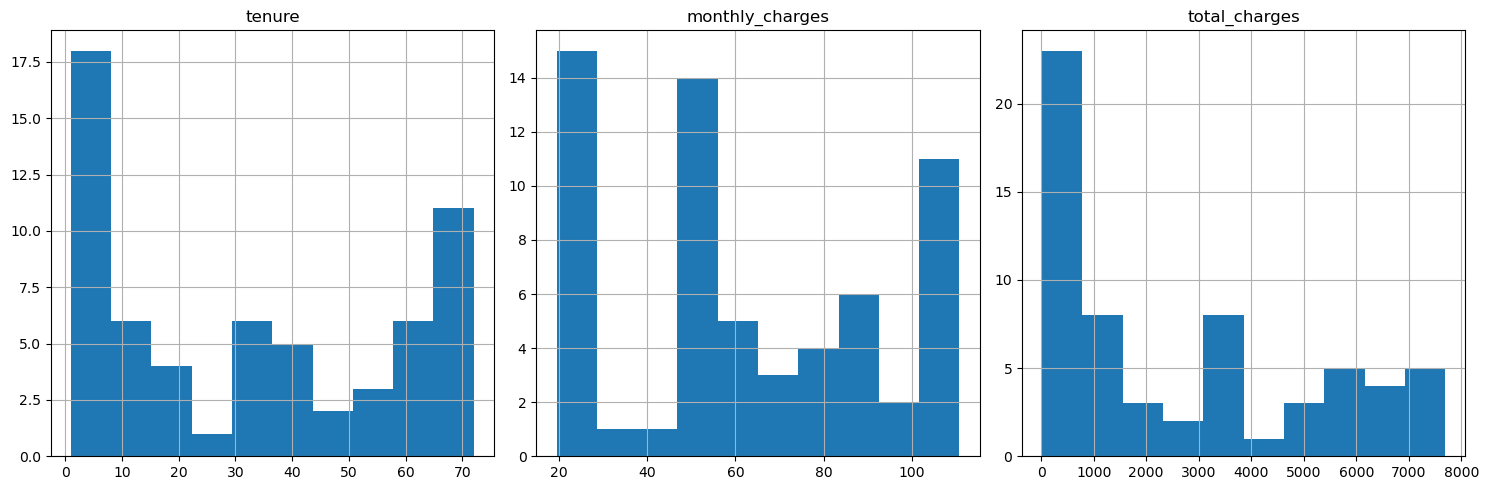

In [149]:
# Select numerical columns
numerical_cols = false_negatives.select_dtypes(include=['float', 'int']).columns.tolist()

# Plot
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    display(false_negatives[col].describe().T)
    false_negatives[col].hist(ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


In [150]:
# Dictionary to store the most frequent values for each column
profile = {}

# Get the mode value for each categorical column
for col in categorical_cols:
    mode_value = false_negatives[col].mode()[0]
    if col == 'senior_citizen':
        mode_value = 'Yes' if mode_value == 1 else 'No'
    profile[col] = mode_value

# Get the mean value for each numerical column
for col in numerical_cols:
    mean_value = false_negatives[col].mean()
    profile[col] = round(mean_value, 2)

# Create a DataFrame from the profile dictionary
churn_profile = pd.DataFrame(profile.items(), columns=['Category', 'churn_not_detected'])

# Set the 'Column' column as the index
churn_profile.set_index('Category', inplace=True)

# Print the customer profile
print("Customer Profile for a customer who is likely to churn unnoticed:")
churn_profile

Customer Profile for a customer who is likely to churn unnoticed:


,churn_not_detected
Category,
gender,Female
senior_citizen,No
partner,No
dependents,No
phone_service,Yes
multiple_lines,No
internet_service,DSL
online_security,Yes
online_backup,Yes


According to our analysis, the customer who is likely to churn and not detected by our prediction model has the following characteristics:
      
      - This customer is a young, single female who does not have any dependents. She has subscribed to DSL internet service and has opted for online security and backup, but not device protection or streaming TV and movies. She is on a month-to-month contract and has opted for paper billing. She prefers to pay through credit card (automatic).
      - On average, she has been a customer for 32.24 months and has a monthly charge of $61.88. Total charges for her service amount to $2628.04.
      
This profile can help us identify similar customers who may be at risk of churning and enable us to take proactive measures to retain their business.

#### Analyzing True Positives & Negatives

In [151]:
# Select all correct predictions
correct_predictions = test_data[test_data['churn'] == test_data['churn_predictions']]
print('Percentage of test data well predicted:', round(len(correct_predictions)/len(test_data)*100, 2), '%')

Percentage of test data well predicted: 75.66 %


In [152]:
true_negatives = test_data[(test_data['churn_predictions'] == 'No') & (test_data['churn'] == 'No')]
display(true_negatives[['churn','churn_predictions']].head(), true_negatives.shape)
print('Percentage of True Negatives:', round(len(true_negatives)/len(correct_predictions)*100, 2), '% (correct predictions)')

,churn,churn_predictions
2715,No,No
3825,No,No
132,No,No
3732,No,No
1672,No,No


(755, 21)

Percentage of True Negatives: 70.83 % (correct predictions)


In [153]:
# Select all rows predicted as 'Churn - Yes', and actually left the company
true_positives = test_data[(test_data['churn_predictions'] == 'Yes') & (test_data['churn'] == 'Yes')]
display(true_positives[['churn','churn_predictions']].head(), true_positives.shape)
print('Percentage of True Positives:', round(len(true_positives)/len(correct_predictions)*100, 2), '% (correct predictions)')

,churn,churn_predictions
185,Yes,Yes
1807,Yes,Yes
1263,Yes,Yes
3801,Yes,Yes
6179,Yes,Yes


(311, 21)

Percentage of True Positives: 29.17 % (correct predictions)


### Profile Customers Churn (detected and not detected by our model)

In [154]:
# Select categorical columns
categorical_cols2 = true_positives.select_dtypes(include='object').columns.tolist()

# Remove 'Churn' and 'churn_predictions'
categorical_cols2.remove('churn')
categorical_cols2.remove('churn_predictions')

# Select numerical columns
numerical_cols2 = true_positives.select_dtypes(include=['float', 'int']).columns.tolist()

In [155]:
# Dictionary to store the most frequent values for each column
profile2 = {}

# Get the mode value for each categorical column
for col in categorical_cols2:
    mode_value = true_positives[col].mode()[0]
    if col == 'senior_citizen':
        mode_value = 'Yes' if mode_value == 1 else 'No'
    profile2[col] = mode_value

# Get the mean value for each numerical column
for col in numerical_cols2:
    mean_value = true_positives[col].mean()
    profile2[col] = round(mean_value, 2)

# Create a DataFrame from the profile dictionary
churn_profile2 = pd.DataFrame(profile2.items(), columns=['Category', 'churn_detected'])

# Set the 'Column' column as the index
churn_profile2.set_index('Category', inplace=True)

# Concatenate both profiles to check differences
churn_profiles = pd.concat([churn_profile, churn_profile2], axis=1)
churn_profiles

,churn_not_detected,churn_detected
Category,,
gender,Female,Female
senior_citizen,No,No
partner,No,No
dependents,No,No
phone_service,Yes,Yes
multiple_lines,No,Yes
internet_service,DSL,Fiber optic
online_security,Yes,No
online_backup,Yes,No


We can see that customers who were correctly identified as having churned were more likely to have multiple lines, fiber optic internet service, and paperless billing. They also had higher monthly charges and lower tenure on average. On the other hand, customers who actually churned but were not detected by the model were more likely to have online security, online backup, and device protection, and were less likely to use electronic check as their payment method.

These differences can provide insights into potential factors that contributed to customer churn, as well as areas where the model may need to be improved in order to better detect churn.

#### All "churn" customers profile

In [156]:
# Select all rows predicted as 'Churn - Yes', and actually left the company
actual_churn = data[(data['churn'] == 'Yes')]
actual_churn.shape

(1869, 20)

In [157]:
# Select categorical columns
categorical_cols3 = actual_churn.select_dtypes(include='object').columns.tolist()

# Remove 'Churn' and 'churn_predictions'
categorical_cols3.remove('churn')
#categorical_cols3.remove('churn_predictions')

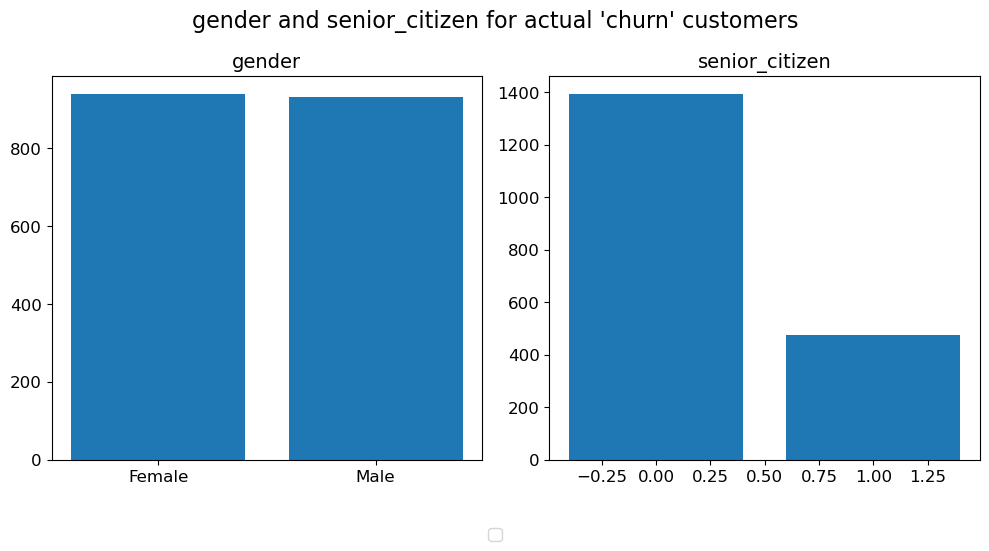

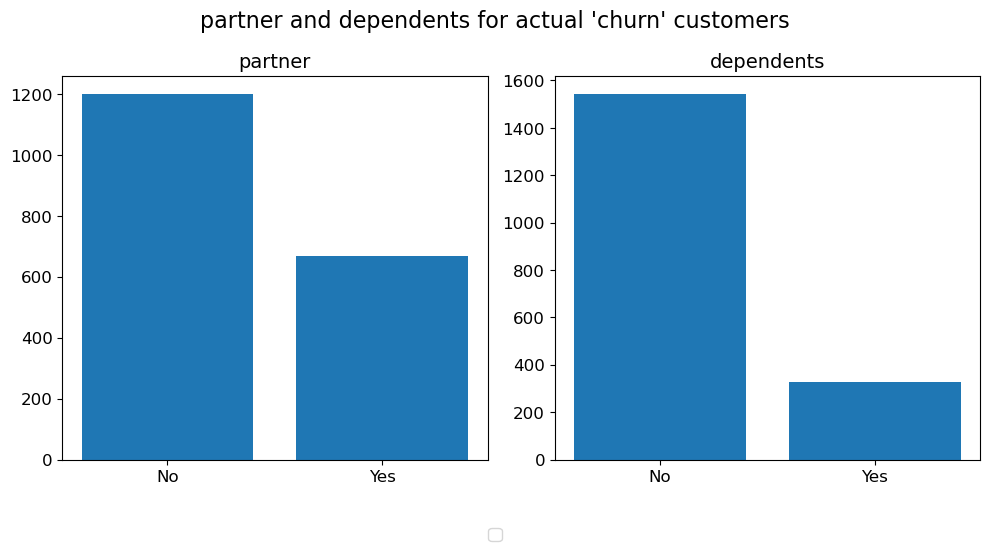

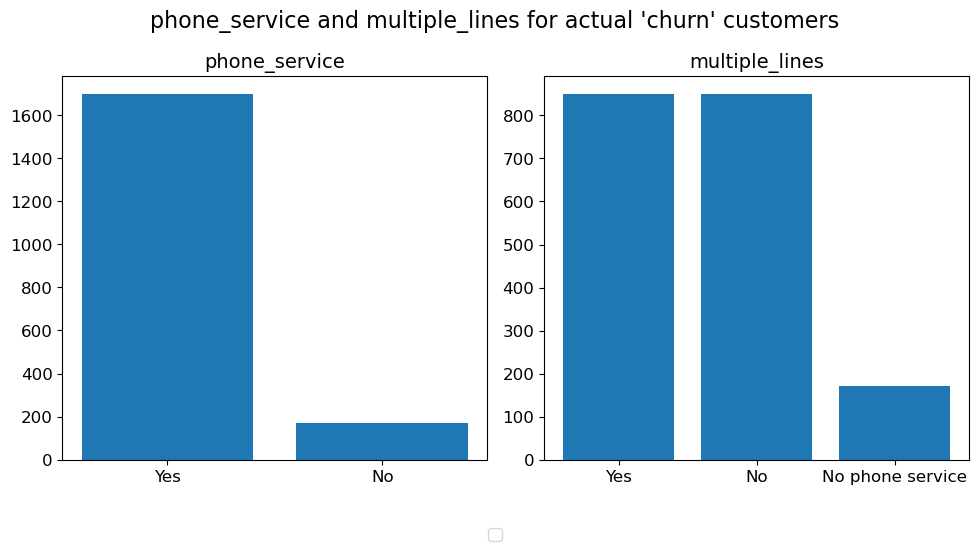

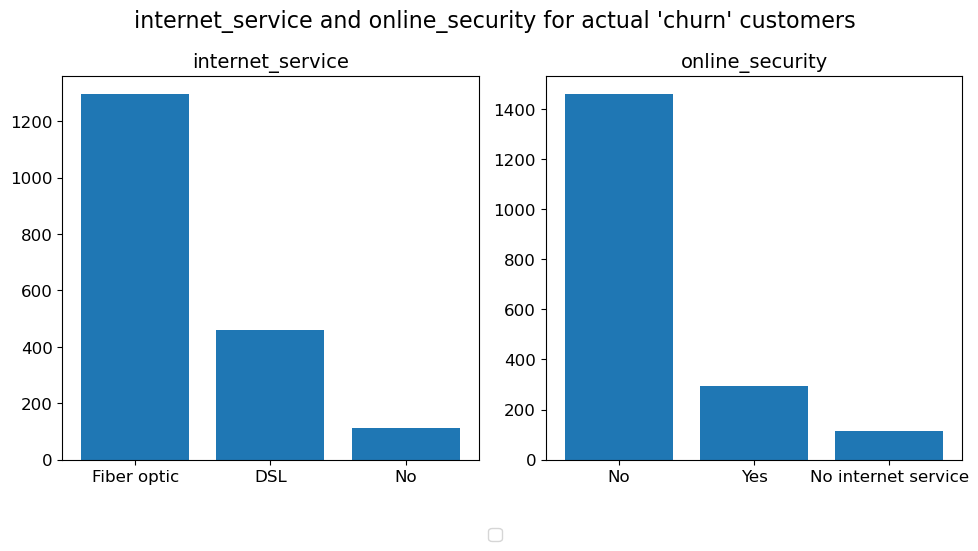

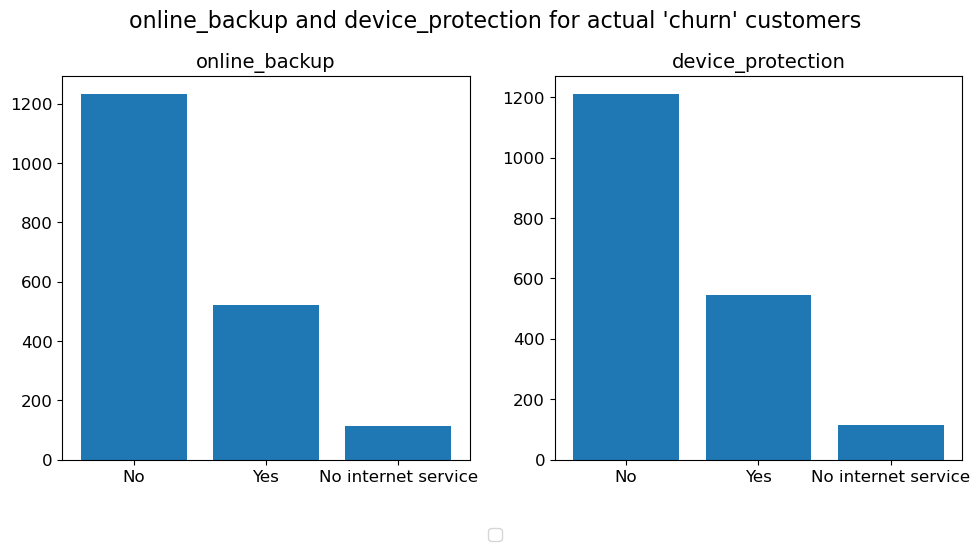

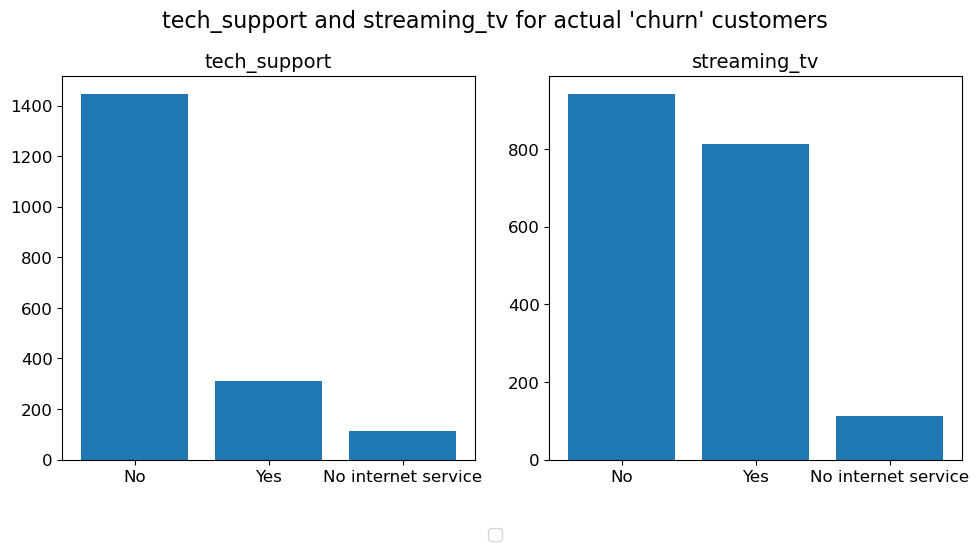

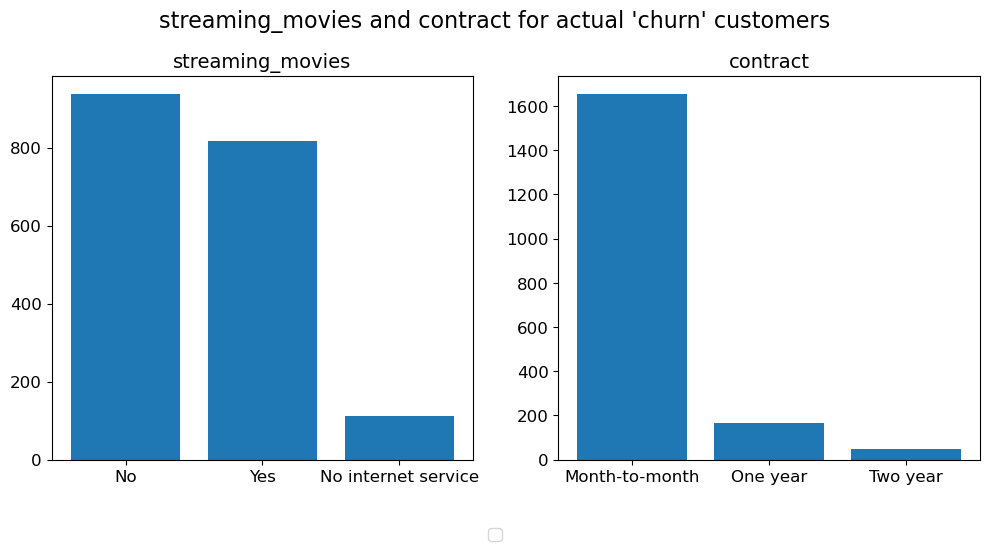

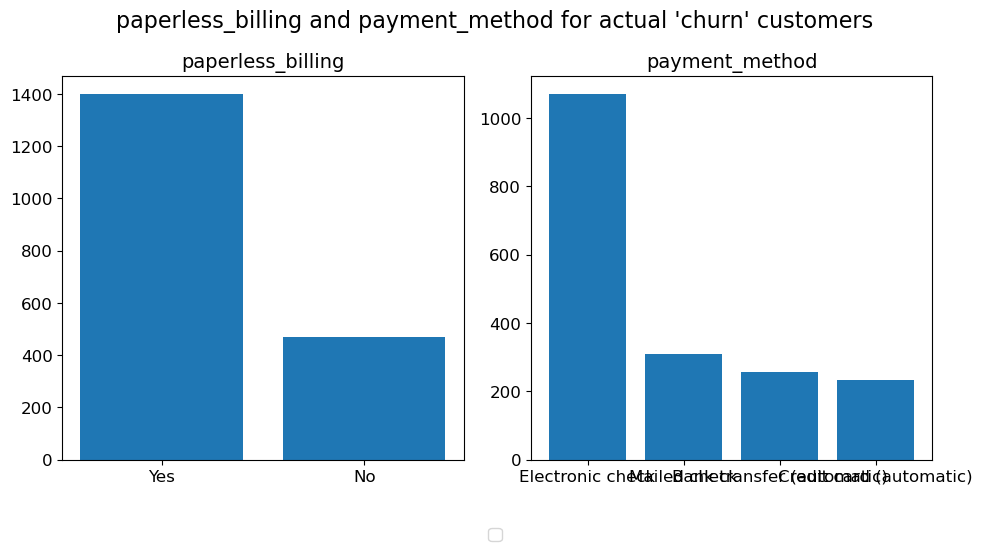

In [158]:
for i, col in enumerate(categorical_cols3):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f"{col} and {categorical_cols3[i+1]} for actual 'churn' customers", fontsize=16)
        
    axs[i%2].bar(actual_churn[col].value_counts().index, actual_churn[col].value_counts().values)
    axs[i%2].set_title(col, fontsize=14)
    axs[i%2].tick_params(axis='both', which='major', labelsize=12)
    axs[i%2].set_xlabel(None)
    
    if i % 2 == 1 or i == len(categorical_cols3)-1:
        handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels), fontsize=12)
        plt.tight_layout()
        plt.show()


count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: monthly_charges, dtype: float64

count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: total_charges, dtype: float64

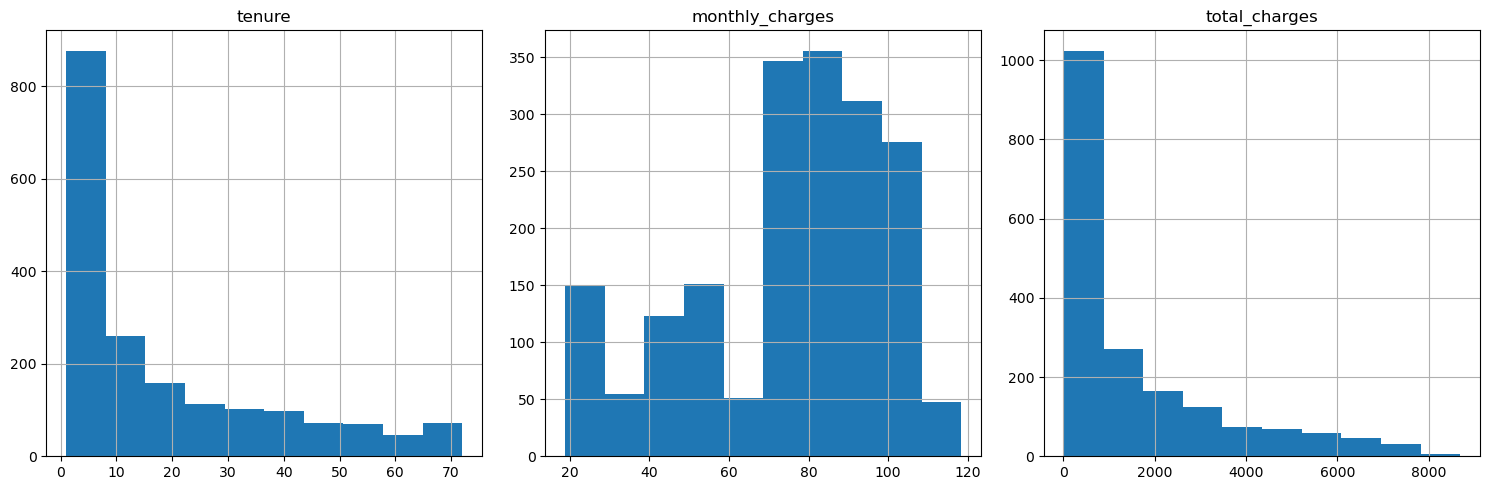

In [159]:
# Select numerical columns
numerical_cols3 = actual_churn.select_dtypes(include=['float', 'int']).columns.tolist()

# Plot
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols3), figsize=(15, 5))
for i, col in enumerate(numerical_cols3):
    display(actual_churn[col].describe().T)
    actual_churn[col].hist(ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


In [160]:
# Dictionary to store the most frequent values for each column
profile3 = {}

# Get the mode value for each categorical column
for col in categorical_cols3:
    mode_value = actual_churn[col].mode()[0]
    if col == 'senior_citizen':
        mode_value = 'Yes' if mode_value == 1 else 'No'
    profile3[col] = mode_value

# Get the mean value for each numerical column
for col in numerical_cols3:
    mean_value = actual_churn[col].mean()
    profile3[col] = round(mean_value, 2)

# Create a DataFrame from the profile dictionary
churn_profile3 = pd.DataFrame(profile3.items(), columns=['Category', 'actual_churn'])

# Set the 'Column' column as the index
churn_profile3.set_index('Category', inplace=True)

# Concatenate both profiles to check differences
churn_profiles = pd.concat([churn_profile, churn_profile2, churn_profile3], axis=1)
churn_profiles

,churn_not_detected,churn_detected,actual_churn
Category,,,
gender,Female,Female,Female
senior_citizen,No,No,No
partner,No,No,No
dependents,No,No,No
phone_service,Yes,Yes,Yes
multiple_lines,No,Yes,Yes
internet_service,DSL,Fiber optic,Fiber optic
online_security,Yes,No,No
online_backup,Yes,No,No


In [161]:
# Select all rows predicted as 'Churn - Yes', and actually left the company
active_customer = data[(data['churn'] == 'No')]
active_customer.shape

(5174, 20)

In [162]:
# Select categorical columns
categorical_cols4 = active_customer.select_dtypes(include='object').columns.tolist()

# Remove 'Churn' and 'churn_predictions'
categorical_cols4.remove('churn')
#categorical_cols4.remove('churn_predictions')

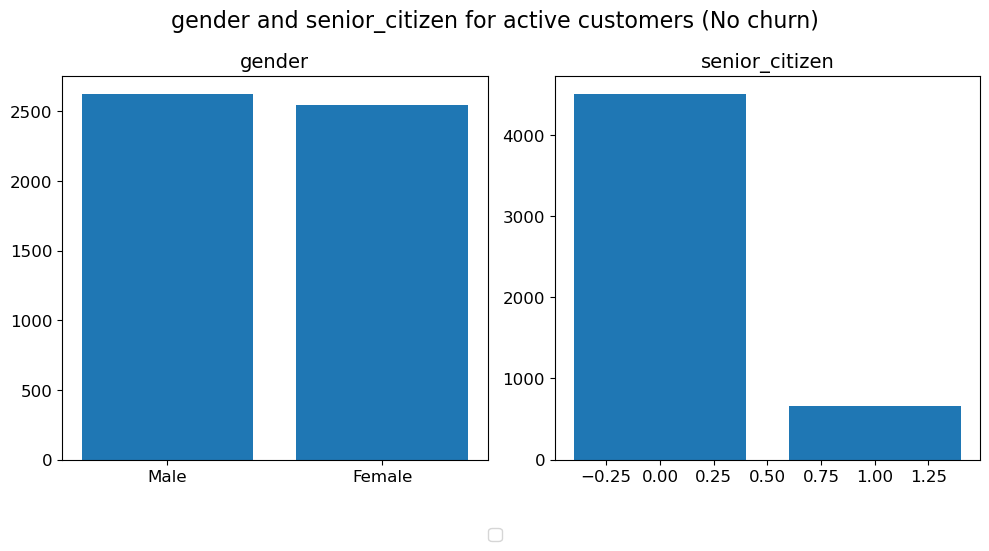

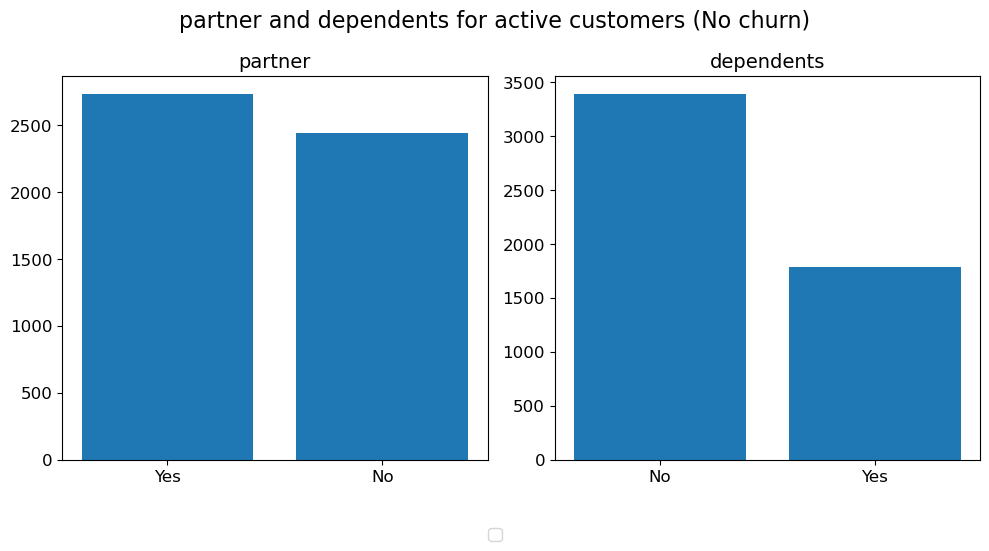

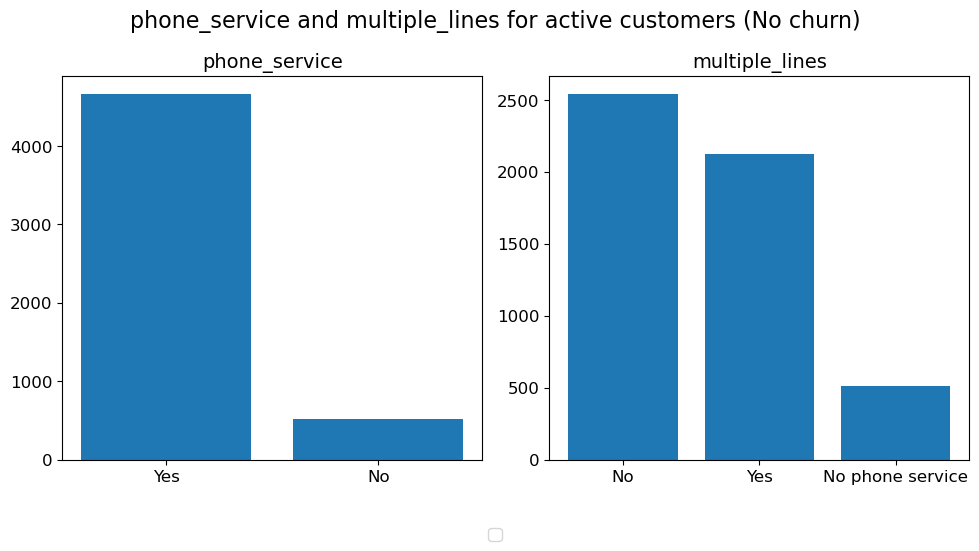

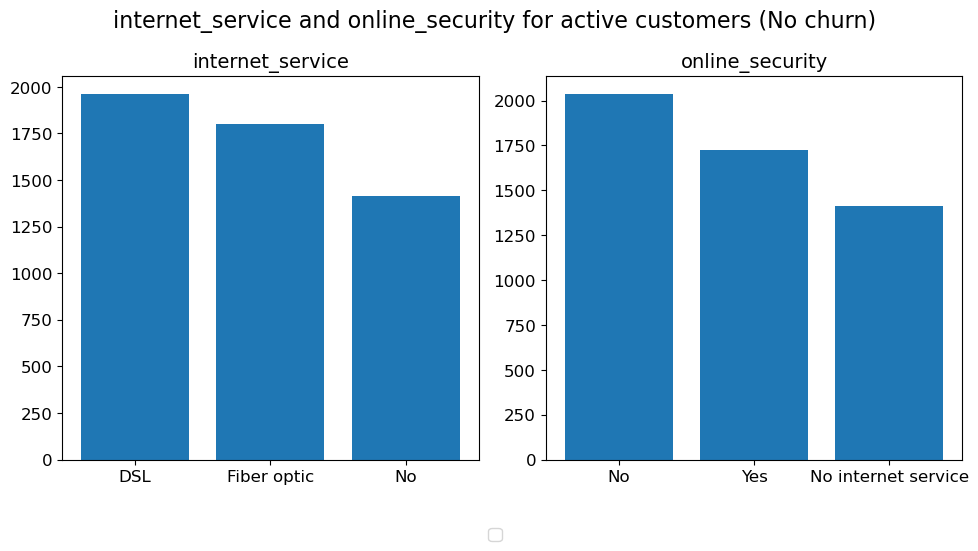

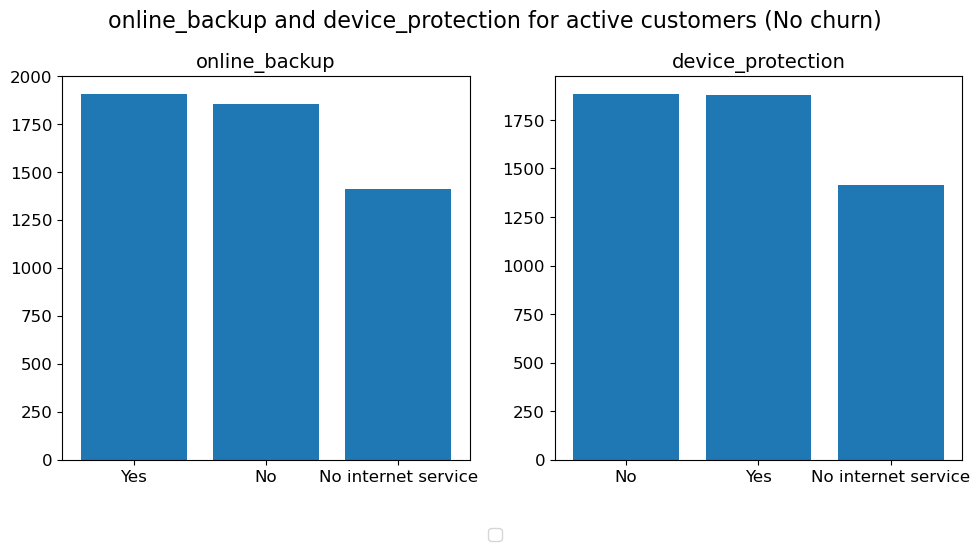

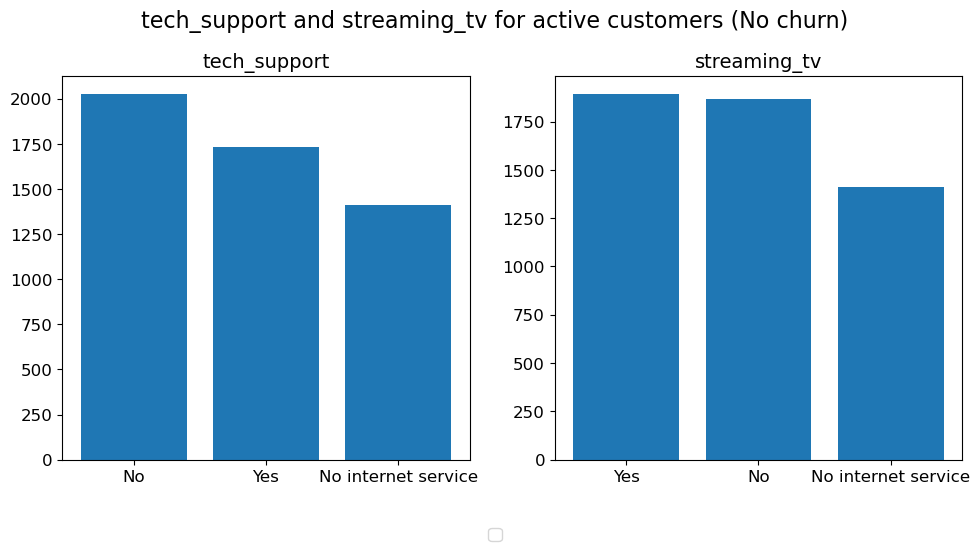

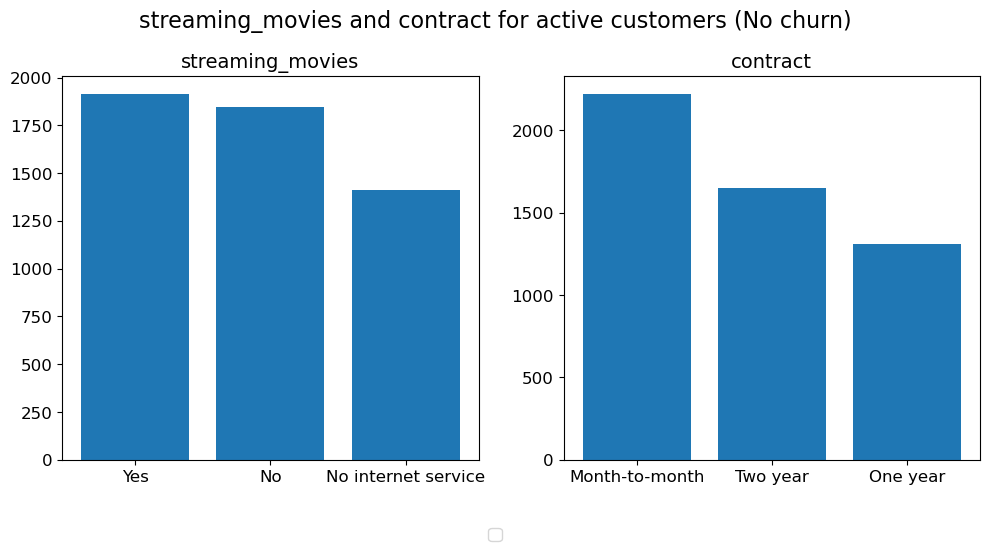

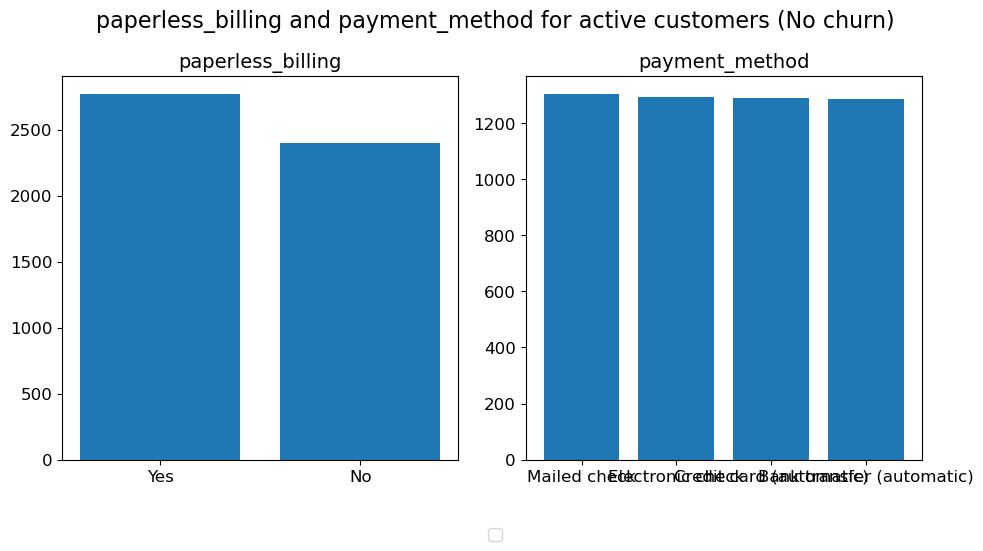

In [163]:
for i, col in enumerate(categorical_cols4):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f"{col} and {categorical_cols4[i+1]} for active customers (No churn)", fontsize=16)
        
    axs[i%2].bar(active_customer[col].value_counts().index, active_customer[col].value_counts().values)
    axs[i%2].set_title(col, fontsize=14)
    axs[i%2].tick_params(axis='both', which='major', labelsize=12)
    axs[i%2].set_xlabel(None)
    
    if i % 2 == 1 or i == len(categorical_cols4)-1:
        handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels), fontsize=12)
        plt.tight_layout()
        plt.show()


count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: monthly_charges, dtype: float64

count    5174.000000
mean     2549.911442
std      2329.954215
min         0.000000
25%       572.900000
50%      1679.525000
75%      4262.850000
max      8672.450000
Name: total_charges, dtype: float64

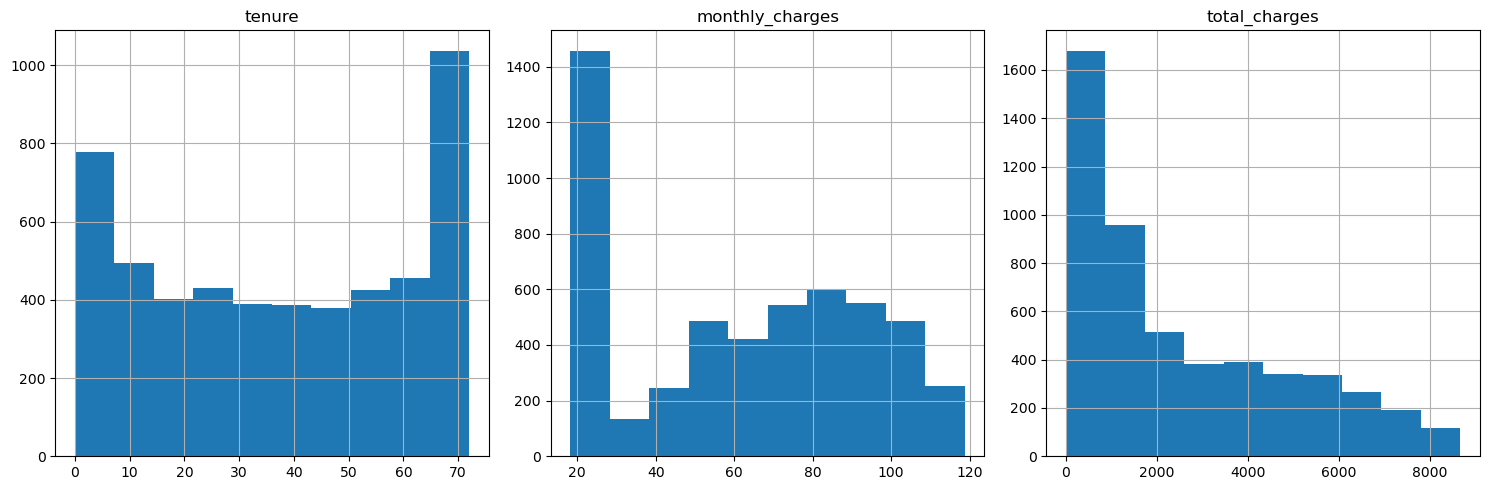

In [164]:
# Select numerical columns
numerical_cols4 = active_customer.select_dtypes(include=['float', 'int']).columns.tolist()

# Plot
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols4), figsize=(15, 5))
for i, col in enumerate(numerical_cols4):
    display(active_customer[col].describe().T)
    active_customer[col].hist(ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


In [165]:
# Dictionary to store the most frequent values for each column
profile4 = {}

# Get the mode value for each categorical column
for col in categorical_cols4:
    mode_value = active_customer[col].mode()[0]
    if col == 'senior_citizen':
        mode_value = 'Yes' if mode_value == 1 else 'No'
    profile4[col] = mode_value

# Get the mean value for each numerical column
for col in numerical_cols4:
    mean_value = active_customer[col].mean()
    profile4[col] = round(mean_value, 2)

# Create a DataFrame from the profile dictionary
churn_profile4 = pd.DataFrame(profile4.items(), columns=['Category', 'active_customer'])

# Set the 'Column' column as the index
churn_profile4.set_index('Category', inplace=True)

# Concatenate both profiles to check differences
churn_profiles = pd.concat([churn_profile, churn_profile2, churn_profile3,churn_profile4], axis=1)
churn_profiles

,churn_not_detected,churn_detected,actual_churn,active_customer
Category,,,,
gender,Female,Female,Female,Male
senior_citizen,No,No,No,No
partner,No,No,No,Yes
dependents,No,No,No,No
phone_service,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,Yes,No
internet_service,DSL,Fiber optic,Fiber optic,DSL
online_security,Yes,No,No,No
online_backup,Yes,No,No,Yes


Looking at the table, we can see that there are some similarities and differences between the "actual churn" and "active customer" categories. For example, both categories have the majority of customers who are not senior citizens, have no dependents, and have phone service. On the other hand, active customers are more likely to have partners and to have multiple lines, while actual churn customers are more likely to have fiber optic internet service and no online security.

One feature that may have well-served as an indicator for detected and not detected churn by our model is the presence of online security and backup. We can see that these features are present in the majority of actual churn customers who were not detected by the model, suggesting that they may be important factors to consider when improving the model's performance.

### Exploratory Analysis: other information on current customers

#### Tenure and charges

In [166]:
gender_numerical = data.groupby('gender')[['tenure', 'monthly_charges', 'total_charges']].mean().round(2)
gender_numerical

,tenure,monthly_charges,total_charges
gender,,,
Female,32.24,65.20,2279.92
Male,32.50,64.33,2279.55


In [167]:
gender_partner = data.groupby(['gender','partner'])[['tenure', 'monthly_charges', 'total_charges']].mean().round(2)
gender_partner

tenure  monthly_charges  total_charges
gender partner                                        
Female No        23.23            63.87        1627.55
       Yes       41.86            66.62        2975.58
Male   No        23.49            60.06        1541.60
       Yes       42.17            68.91        3072.19

Male customers who have a partner tend to have the highest monthly and total charges, while female customers who don't have a partner tend to have the lowest charges.

Additionally, male customers with a partner also have the highest tenure, indicating they remain customers for the longest time.

Overall, male customers with a partner are the most lucrative for the company.

In [168]:
gender_senior = data.groupby(['senior_citizen','gender'])[['tenure', 'monthly_charges', 'total_charges']].mean().round(2)
gender_senior

tenure  monthly_charges  total_charges
senior_citizen gender                                        
0              Female   32.17            62.11        2170.98
               Male     32.21            61.59        2182.94
1              Female   32.62            81.11        2839.93
               Male     33.96            78.54        2781.30

In [169]:
gender_partner_senior = data.groupby(['senior_citizen','gender','partner'])[['tenure', 'monthly_charges', 'total_charges']].mean().round(2)
gender_partner_senior

tenure  monthly_charges  total_charges
senior_citizen gender partner                                        
0              Female No        22.87            60.71        1520.68
                      Yes       41.73            63.55        2839.35
               Male   No        23.19            57.77        1474.66
                      Yes       42.55            65.97        2994.73
1              Female No        24.86            78.50        2121.82
                      Yes       42.64            84.48        3766.53
               Male   No        25.38            74.71        1969.57
                      Yes       40.54            81.48        3403.21

Customers who are senior citizens (1) tend to have higher monthly and total charges compared to those who are not senior citizens (0).However, there is no significant difference in tenure between senior and non-senior customers.

Among non-senior customers, there is not much difference in charges between genders. However, among senior customers, females tend to have higher monthly and total charges than males.

Overall, as we can see in the following graph, the most lucrative group for the company are senior female customers, who have the highest monthly and total charges.

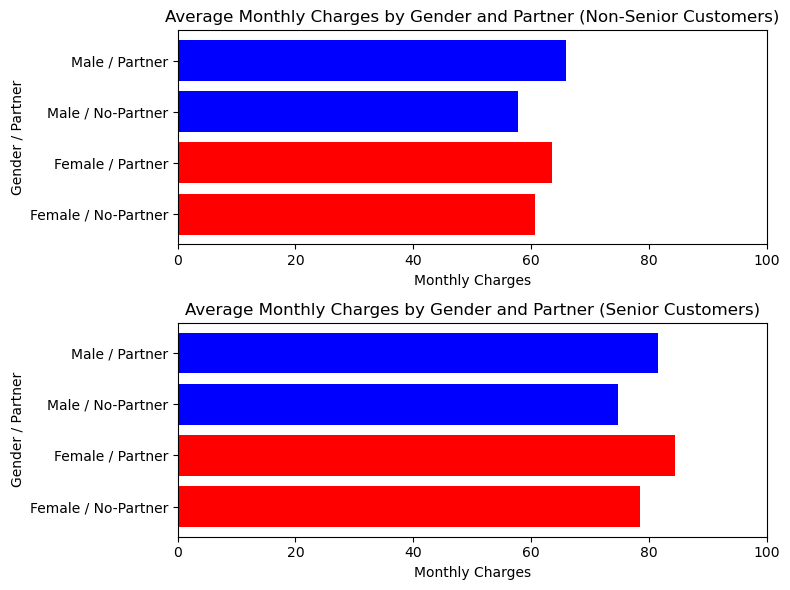

In [170]:
# Plot 'monthly_charges' filtered by 'senior_citizen', 'gender' and 'partner'

# Filter the dataframe to only show non-senior customers
df = gender_partner_senior.loc[0]
# Replace the 'Yes' and 'No' values in the partner column with 'Partner' and 'No-Partner'
df.index = df.index.set_levels(df.index.levels[1].map({'Yes': 'Partner', 'No': 'No-Partner'}), level=1)
# Extract the monthly_charges column and convert to a list
monthly_charges = df['monthly_charges'].tolist()
# Extract the index values (gender and partner) and create a list of labels
labels = [f'{index[0]} / {index[1]}' for index in df.index.tolist()]
# Create a list of colors for the bars
colors = ['blue' if index[0] == 'Male' else 'red' for index in df.index.tolist()]
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
# Create the non-senior subplot
axs[0].barh(labels, monthly_charges, color=colors)
axs[0].set_xlabel('Monthly Charges')
axs[0].set_ylabel('Gender / Partner')
axs[0].set_title('Average Monthly Charges by Gender and Partner (Non-Senior Customers)')
axs[0].set_xlim([0, 100])


# Now the same for senior customers
df = gender_partner_senior.loc[1]
# Replace the 'Yes' and 'No' values in the partner column with 'Partner' and 'No-Partner'
df.index = df.index.set_levels(df.index.levels[1].map({'Yes': 'Partner', 'No': 'No-Partner'}), level=1)
# Extract the monthly_charges column and convert to a list
monthly_charges = df['monthly_charges'].tolist()
# Extract the index values (gender and partner) and create a list of labels
labels = [f'{index[0]} / {index[1]}' for index in df.index.tolist()]
# Create a list of colors for the bars
colors = ['blue' if index[0] == 'Male' else 'red' for index in df.index.tolist()]
# Create the senior subplot
axs[1].barh(labels, monthly_charges, color=colors)
axs[1].set_xlabel('Monthly Charges')
axs[1].set_ylabel('Gender / Partner')
axs[1].set_title('Average Monthly Charges by Gender and Partner (Senior Customers)')
axs[1].set_xlim([0, 100])
# Adjust the layout and display the plot
fig.tight_layout()
plt.show()

#### Services

In [171]:
data.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [172]:
contract_types = data.groupby(['contract']).agg(
    count=('gender', 'count'),
    avg_monthly_charges=('monthly_charges', 'mean'),
    sum_total_charges=('total_charges', 'sum')
)

# Calculate percentage of count
contract_types['percentage'] = round(contract_types['count'] / contract_types['count'].sum() * 100,2)

contract_types = contract_types[['count','percentage','avg_monthly_charges','sum_total_charges']]

contract_types

,count,percentage,avg_monthly_charges,sum_total_charges
contract,,,,
Month-to-month,3875,55.02,66.398490,5305861.5
One year,1473,20.91,65.048608,4467053.5
Two year,1695,24.07,60.770413,6283253.7


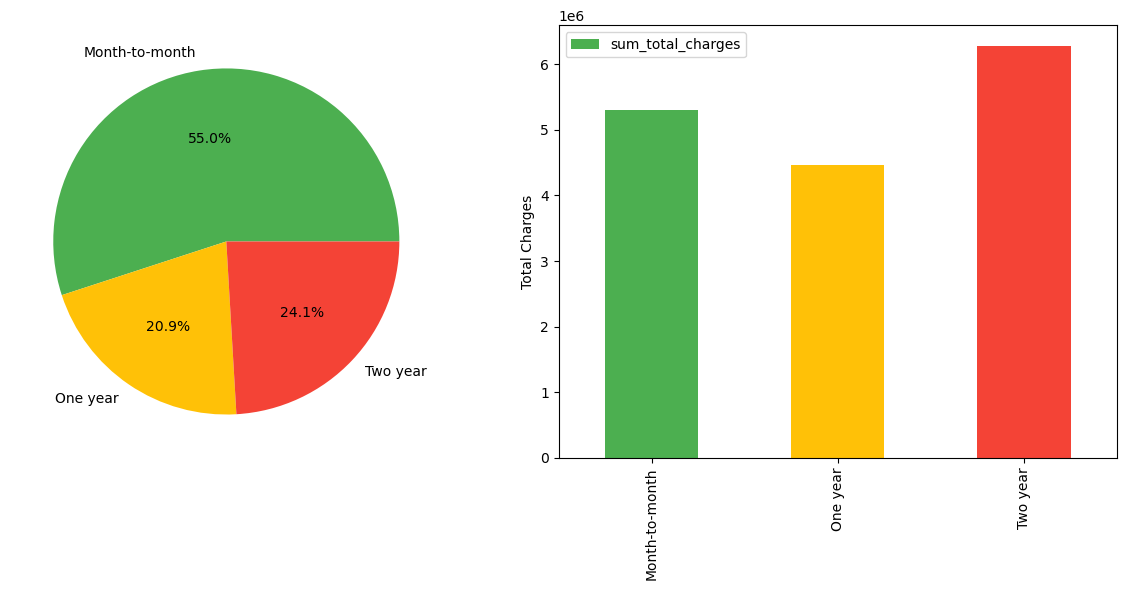

In [173]:
# Set color palette
colors = ['#4CAF50', '#FFC107', '#F44336']

# Create the figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Pie chart for percentage of count
contract_types.plot(y='percentage', kind='pie', ax=ax1, legend=False, autopct='%1.1f%%', colors=colors)
ax1.set_ylabel('')

# Reset index to turn 'contract' into a column
contract_types = contract_types.reset_index()

# Bar chart for total charges
contract_types.plot(x='contract', y='sum_total_charges', kind='bar', ax=ax2, color=colors)
ax2.set_xlabel('')
ax2.set_ylabel('Total Charges')

plt.tight_layout()
plt.show()


In [174]:
print(contract_types.columns)


Index(['contract', 'count', 'percentage', 'avg_monthly_charges',
       'sum_total_charges'],
      dtype='object')


In [175]:
contract_gender = data.groupby(['contract','gender']).agg(
    count=('gender', 'count'),
    avg_monthly_charges=('monthly_charges', 'mean'),
    sum_total_charges=('total_charges', 'sum')
)

# Calculate percentage of count
contract_gender['percentage'] = round(contract_gender['count'] / contract_gender['count'].sum() * 100,2)

contract_gender = contract_gender[['count','percentage','avg_monthly_charges','sum_total_charges']]

contract_gender

count  percentage  avg_monthly_charges  \
contract       gender                                           
Month-to-month Female   1925       27.33            66.652623   
               Male     1950       27.69            66.147615   
One year       Female    718       10.19            66.841643   
               Male      755       10.72            63.343444   
Two year       Female    845       12.00            60.513373   
               Male      850       12.07            61.025941   

                       sum_total_charges  
contract       gender                     
Month-to-month Female          2605975.8  
               Male            2699885.7  
One year       Female          2248225.9  
               Male            2218827.6  
Two year       Female          3098152.5  
               Male            3185101.2

In [176]:
contract_billing = data.groupby(['payment_method','paperless_billing','contract']).agg(
    count=('gender', 'count'),
    avg_monthly_charges=('monthly_charges', 'mean'),
    sum_total_charges=('total_charges', 'sum')
)

# Calculate percentage of count
contract_billing['percentage'] = round(contract_billing['count'] / contract_billing['count'].sum() * 100,2)

contract_billing = contract_billing[['count','percentage','avg_monthly_charges','sum_total_charges']]

contract_billing

count  percentage  \
payment_method            paperless_billing contract                            
Bank transfer (automatic) No                Month-to-month    206        2.92   
                                            One year          171        2.43   
                                            Two year          276        3.92   
                          Yes               Month-to-month    383        5.44   
                                            One year          220        3.12   
                                            Two year          288        4.09   
Credit card (automatic)   No                Month-to-month    161        2.29   
                                            One year          174        2.47   
                                            Two year          305        4.33   
                          Yes               Month-to-month    382        5.42   
                                            One year          224        3.18   
                                            Two year          276        3.92   
Electronic check          No                Month-to-month    453        6.43   
                                            One year          114        1.62   
                                            Two year           56        0.80   
                          Yes               Month-to-month   1397       19.84   
                                            One year          233        3.31   
                                            Two year          112        1.59   
Mailed check              No                Month-to-month    469        6.66   
                                            One year          214        3.04   
                                            Two year          273        3.88   
                          Yes               Month-to-month    424        6.02   
                                            One year          123        1.75   
                                            Two year          109        1.55   

                                                            avg_monthly_charges  \
payment_method            paperless_billing contract                              
Bank transfer (automatic) No                Month-to-month            58.297330   
                                            One year                  55.902339   
                                            Two year                  53.804710   
                          Yes               Month-to-month            74.887859   
                                            One year                  76.486364   
                                            Two year                  75.756076   
Credit card (automatic)   No                Month-to-month            55.543168   
                                            One year                  56.469540   
                                            Two year                  54.208361   
                          Yes               Month-to-month            72.793586   
                                            One year                  76.907589   
                                            Two year                  75.709058   
Electronic check          No                Month-to-month            66.673841   
                                            One year                  67.514035   
                                            Two year                  70.040179   
                          Yes               Month-to-month            77.685970   
                                            One year                  84.761588   
                                            Two year                  91.483482   
Mailed check              No                Month-to-month            38.653305   
                                            One year                  37.777570   
                                            Two year                  35.049634   
                          Yes               

In [177]:
phone_services = data.groupby(['phone_service', 'multiple_lines']).agg(
    count=('gender', 'count'),
    avg_monthly_charges=('monthly_charges', 'mean'),
    sum_total_charges=('total_charges', 'sum')
)

# Calculate percentage of count
phone_services['percentage'] = round(phone_services['count'] / phone_services['count'].sum() * 100,2)

phone_services = phone_services[['count','percentage','avg_monthly_charges','sum_total_charges']]

phone_services

count  percentage  avg_monthly_charges  \
phone_service multiple_lines                                             
No            No phone service    682        9.68            42.028592   
Yes           No                 3390       48.13            54.195059   
              Yes                2971       42.18            82.036974   

                                sum_total_charges  
phone_service multiple_lines                       
No            No phone service         1020294.95  
Yes           No                       4569184.90  
              Yes                     10466688.85

In [178]:
device_services = data.groupby(['phone_service', 'multiple_lines','device_protection']).agg(
    count=('gender', 'count'),
    avg_monthly_charges=('monthly_charges', 'mean'),
    sum_total_charges=('total_charges', 'sum')
)

# Calculate percentage of count
device_services['percentage'] = round(device_services['count'] / device_services['count'].sum() * 100,2)

device_services = device_services[['count','percentage','avg_monthly_charges','sum_total_charges']]

device_services

count  percentage  \
phone_service multiple_lines   device_protection                        
No            No phone service No                     377        5.35   
                               Yes                    305        4.33   
Yes           No               No                    1443       20.49   
                               No internet service   1184       16.81   
                               Yes                    763       10.83   
              Yes              No                    1275       18.10   
                               No internet service    342        4.86   
                               Yes                   1354       19.22   

                                                    avg_monthly_charges  \
phone_service multiple_lines   device_protection                          
No            No phone service No                             36.096950   
                               Yes                            49.360492   
Yes           No               No                             68.511642   
                               No internet service            19.955152   
                               Yes                            80.251704   
              Yes              No                             83.168157   
                               No internet service            24.970614   
                               Yes                            95.385894   

                                                    sum_total_charges  
phone_service multiple_lines   device_protection                       
No            No phone service No                           349683.25  
                               Yes                          670611.70  
Yes           No               No                          1817085.85  
                               No internet service          610235.15  
                               Yes                         2141863.90  
              Yes              No                          3398594.80  
                               No internet service          400899.75  
                               Yes                         6667194.30

In [179]:
internet_service = data.groupby(['internet_service']).agg(
    count=('gender', 'count'),
    avg_monthly_charges=('monthly_charges', 'mean'),
    sum_total_charges=('total_charges', 'sum')
)

# Calculate percentage of count
internet_service['percentage'] = round(internet_service['count'] / internet_service['count'].sum() * 100,2)

internet_service = internet_service[['count','percentage','avg_monthly_charges','sum_total_charges']]

internet_service

,count,percentage,avg_monthly_charges,sum_total_charges
internet_service,,,,
DSL,2421,34.37,58.102169,5121410.85
Fiber optic,3096,43.96,91.500129,9923622.95
No,1526,21.67,21.079194,1011134.90


In [180]:
internet_gender_senior = data.groupby(['internet_service','gender','senior_citizen']).agg(
    count=('gender', 'count'),
    avg_monthly_charges=('monthly_charges', 'mean'),
    sum_total_charges=('total_charges', 'sum')
)

# Calculate percentage of count
internet_gender_senior['percentage'] = round(internet_gender_senior['count'] / internet_gender_senior['count'].sum() * 100,2)

internet_gender_senior = internet_gender_senior[['count','percentage','avg_monthly_charges','sum_total_charges']]

internet_gender_senior

count  percentage  \
internet_service gender senior_citizen                      
DSL              Female 0                1065       15.12   
                        1                 123        1.75   
                 Male   0                1097       15.58   
                        1                 136        1.93   
Fiber optic      Female 0                1129       16.03   
                        1                 424        6.02   
                 Male   0                1136       16.13   
                        1                 407        5.78   
No               Female 0                 726       10.31   
                        1                  21        0.30   
                 Male   0                 748       10.62   
                        1                  31        0.44   

                                        avg_monthly_charges  sum_total_charges  
internet_service gender senior_citizen                                          
DSL              Female 0                         58.873897         2263600.90  
                        1                         56.139024          267342.65  
                 Male   0                         58.089517         2312355.15  
                        1                         53.936397          278112.15  
Fiber optic      Female 0                         91.534145         3586859.55  
                        1                         91.308608         1329990.70  
                 Male   0                         91.696171         3721146.50  
                        1                         91.058108         1285626.20  
No               Female 0                         21.100964          488811.20  
                        1                         21.447619           15749.20  
                 Male   0                         21.000869          473844.15  
                        1                         22.209677           32730.35

In [181]:
internet_services = data.groupby(['internet_service','online_security','online_backup','tech_support']).agg(
    count=('gender', 'count'),
    avg_monthly_charges=('monthly_charges', 'mean'),
    sum_total_charges=('total_charges', 'sum')
)

# Calculate percentage of count
internet_services['percentage'] = round(internet_services['count'] / internet_services['count'].sum() * 100,2)

internet_services = internet_services[['count','percentage','avg_monthly_charges','sum_total_charges']]

internet_services

count  \
internet_service online_security     online_backup       tech_support                 
DSL              No                  No                  No                     549   
                                                         Yes                    243   
                                     Yes                 No                     239   
                                                         Yes                    210   
                 Yes                 No                  No                     248   
                                                         Yes                    295   
                                     Yes                 No                     207   
                                                         Yes                    430   
Fiber optic      No                  No                  No                    1164   
                                                         Yes                    239   
                                     Yes                 No                     601   
                                                         Yes                    253   
                 Yes                 No                  No                     235   
                                                         Yes                    115   
                                     Yes                 No                     230   
                                                         Yes                    259   
No               No internet service No internet service No internet service   1526   

                                                                              percentage  \
internet_service online_security     online_backup       tech_support                      
DSL              No                  No                  No                         7.79   
                                                         Yes                        3.45   
                                     Yes                 No                         3.39   
                                                         Yes                        2.98   
                 Yes                 No                  No                         3.52   
                                                         Yes                        4.19   
                                     Yes                 No                         2.94   
                                                         Yes                        6.11   
Fiber optic      No                  No                  No                        16.53   
                                                         Yes                        3.39   
                                     Yes                 No                         8.53   
                                                         Yes                        3.59   
                 Yes                 No                  No                         3.34   
                                                         Yes                        1.63   
                                     Yes                 No                         3.27   
                                                         Yes                        3.68   
No               No internet service No internet service No internet service       21.67   

                                                                              avg_monthly_charges  \
internet_service online_security     online_backup       tech_support                               
DSL              No                  No                  No                             45.634882   
                                                         Yes                            56.001235   
                                     Yes                 No                             51.822594   
                                                         Yes                            65.183333   
                 Yes                 No                  No          

In [182]:
gender_tech = data.groupby(['tech_support','gender']).agg(
    count=('gender', 'count'),
    avg_monthly_charges=('monthly_charges', 'mean'),
    sum_total_charges=('total_charges', 'sum')
)

# Calculate percentage of count
gender_tech['percentage'] = round(gender_tech['count'] / gender_tech['count'].sum() * 100,2)

gender_tech = gender_tech[['count','percentage','avg_monthly_charges','sum_total_charges']]

gender_tech

count  percentage  avg_monthly_charges  \
tech_support        gender                                           
No                  Female   1714       24.34            74.754084   
                    Male     1759       24.98            74.423565   
No internet service Female    747       10.61            21.110710   
                    Male      779       11.06            21.048973   
Yes                 Female   1027       14.58            81.338072   
                    Male     1017       14.44            80.015733   

                            sum_total_charges  
tech_support        gender                     
No                  Female         3520256.70  
                    Male           3735829.85  
No internet service Female          504560.40  
                    Male            506574.50  
Yes                 Female         3927537.10  
                    Male           3861410.15

In [183]:
gender_senior_tech = data.groupby(['tech_support','senior_citizen','gender']).agg(
    count=('gender', 'count'),
    avg_monthly_charges=('monthly_charges', 'mean'),
    sum_total_charges=('total_charges', 'sum')
)

# Calculate percentage of count
gender_senior_tech['percentage'] = round(gender_senior_tech['count'] / gender_senior_tech['count'].sum() * 100,2)

gender_senior_tech = gender_senior_tech[['count','percentage','avg_monthly_charges','sum_total_charges']]

gender_senior_tech

count  percentage  \
tech_support        senior_citizen gender                      
No                  0              Female   1308       18.57   
                                   Male     1335       18.95   
                    1              Female    406        5.76   
                                   Male      424        6.02   
No internet service 0              Female    726       10.31   
                                   Male      748       10.62   
                    1              Female     21        0.30   
                                   Male       31        0.44   
Yes                 0              Female    886       12.58   
                                   Male      898       12.75   
                    1              Female    141        2.00   
                                   Male      119        1.69   

                                           avg_monthly_charges  \
tech_support        senior_citizen gender                        
No                  0              Female            73.026414   
                                   Male              72.714382   
                    1              Female            80.320074   
                                   Male              79.805071   
No internet service 0              Female            21.100964   
                                   Male              21.000869   
                    1              Female            21.447619   
                                   Male              22.209677   
Yes                 0              Female            79.598420   
                                   Male              78.861192   
                    1              Female            92.269504   
                                   Male              88.728151   

                                           sum_total_charges  
tech_support        senior_citizen gender                     
No                  0              Female         2582248.70  
                                   Male           2709994.45  
                    1              Female          938008.00  
                                   Male           1025835.40  
No internet service 0              Female          488811.20  
                                   Male            473844.15  
                    1              Female           15749.20  
                                   Male             32730.35  
Yes                 0              Female         3268211.75  
                                   Male           3323507.20  
                    1              Female          659325.35  
                                   Male            537902.95